# Пример инференса модели

## Импорт необходимых библиотек

In [2]:
import sys
import os
from tqdm.auto import tqdm
sys.path.append(os.path.abspath('..'))

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from src.models.model_inference import TabNetInference
from src.utils import checkpoint_path

import torch
import numpy as np
import random

def set_seed(seed: int):
    random.seed(seed)                      # Для модуля random
    np.random.seed(seed)                   # Для numpy
    torch.manual_seed(seed)                # Для CPU в PyTorch
    torch.cuda.manual_seed(seed)           # Для GPU в PyTorch
    torch.cuda.manual_seed_all(seed)       # Для всех GPU (если используется несколько)
    torch.backends.cudnn.deterministic = True  # Для детерминированности
    torch.backends.cudnn.benchmark = False     # Отключить оптимизации, которые делают процесс случайным

set_seed(42)

/home/students/bubbles_champagne/venv/lib/python3.10/site-packages/pydantic/main.py:212: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


## Пример инференса

In [3]:
CHECKPOINT_ARCHIVE = os.path.join(checkpoint_path, "trained_model_task1.zip")
TEST_IMAGES_FOLDER = "/home/students/bubbles_champagne/frames/test"
TASK_NUMBER = 1

In [4]:
inference = TabNetInference(CHECKPOINT_ARCHIVE, TASK_NUMBER)

/home/students/bubbles_champagne/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/students/bubbles_champagne/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=T

Checkpoint extracted to trained_model_task1


In [4]:
X_test, y_test = inference.load_images(TEST_IMAGES_FOLDER)

Processing images: 100%|██████████| 2472/2472 [02:34<00:00, 16.02it/s]


In [5]:
y_true, y_pred = inference.evaluate(X_test, y_test)

Test Accuracy: 0.8467


In [6]:
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

0.8466828478964401
              precision    recall  f1-score   support

        pink       0.86      0.83      0.84      1217
       white       0.84      0.86      0.85      1255

    accuracy                           0.85      2472
   macro avg       0.85      0.85      0.85      2472
weighted avg       0.85      0.85      0.85      2472

[[1009  208]
 [ 171 1084]]


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

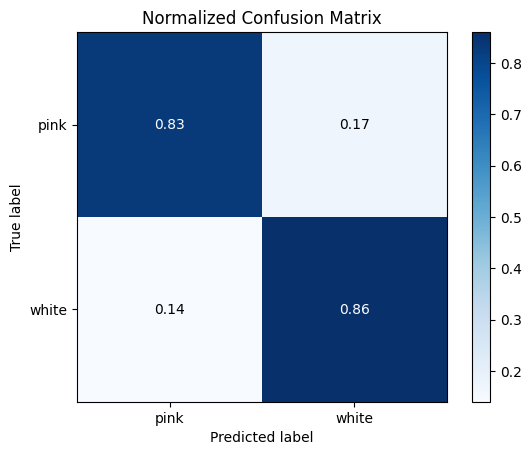

In [7]:
plot_confusion_matrix(y_true, y_pred, normalize=True)

In [9]:
CHECKPOINT_ARCHIVE = os.path.join(checkpoint_path, "trained_model_task2.zip")
TEST_IMAGES_FOLDER = "/home/students/bubbles_champagne/frames/test"
TASK_NUMBER = 2

inference = TabNetInference(CHECKPOINT_ARCHIVE, TASK_NUMBER)
X_test, y_test = inference.load_images(TEST_IMAGES_FOLDER)
y_true, y_pred = inference.evaluate(X_test, y_test)

print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

Checkpoint extracted to trained_model_task2


Processing images: 100%|██████████| 2472/2472 [02:38<00:00, 15.62it/s]


Test Accuracy: 0.8220
0.8220064724919094
              precision    recall  f1-score   support

       glass       0.75      0.93      0.83      1161
     plastic       0.92      0.72      0.81      1311

    accuracy                           0.82      2472
   macro avg       0.84      0.83      0.82      2472
weighted avg       0.84      0.82      0.82      2472

[[1083   78]
 [ 362  949]]


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

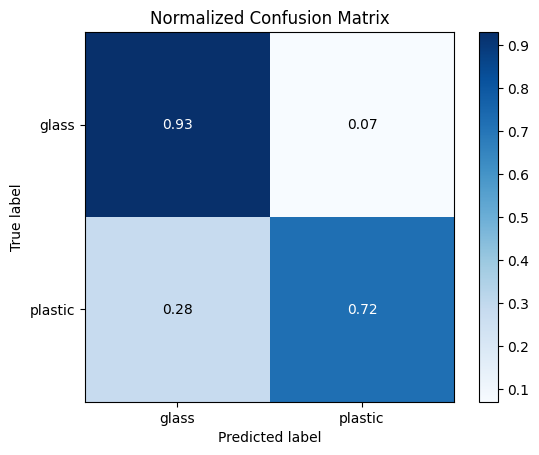

In [10]:
plot_confusion_matrix(y_true, y_pred, normalize=True)